# Сложные графики matplotlib

Подготовка данных

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем столбец с таймстемпом
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head()

air_quality.csv      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0      10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1      10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2      10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3      10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4      10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH                  ts  
0  13,6  48,9  0,7578 2004-03-10 18:00:00  
1  13,3  47,7  0,7255 2004-03-10 19:00:00  
2  11,9  54,0  0,7502 2004-03-10 20:00:00  
3  11,0  60,0  0,7867 2004-03-10 21:00:00  
4  11,2  59,6  0,7888 2004-03-10 22:00:00

## Гистограмма

Позволяет сделать вывод о распределении данных - сколько объектов выборки попадает в каждый интервал на оси oX

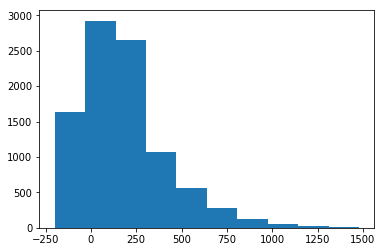

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

register_matplotlib_converters()
fig, subplot = plt.subplots()

subplot.hist(
    air_df['NOx(GT)'].values, bins=10, histtype='bar',
    align='mid', orientation='vertical'
)

plt.show()

## Круговая диаграмма

Позволяет отобразить, какую долю от целого составляет каждый компонент

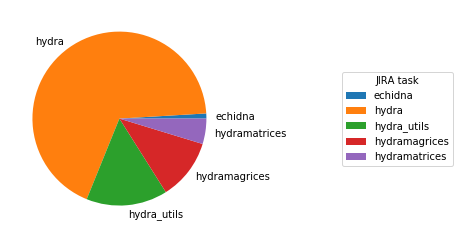

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

data = pd.read_csv('./data/task.csv')
agg_df = data.groupby('Компонент')['Затрачено в часах'].sum()

fig, subplot = plt.subplots()

wedges, texts = subplot.pie(agg_df.values, explode=None, labels=agg_df.index.values)

subplot.legend(wedges, agg_df.index.values,
          title="JIRA task",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))

plt.show()

## Статистическиая информация на графике:  BoxPlot

Кроме "общеупотребимых" графиков Matplotlib предоставляет широчайший набор разных интересных возможностей для визуализации данных - например, boxplot (который в народе называется *ящик с усами*)

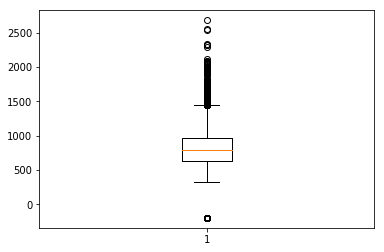

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

fig, subplot = plt.subplots()

subplot.boxplot(air_df['PT08.S3(NOx)'].values, meanline=True)

plt.show()

## Столбчатые диаграммы

Загружаем исходные данные

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('./data/task.csv')
agg_df = data.groupby('Компонент')['Затрачено в часах'].sum()

%matplotlib inline

Метод, которые строить диаграмму называется `.bar()`

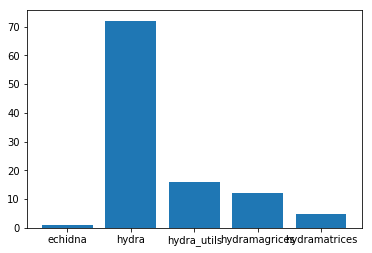

In [6]:
fig, subplot = plt.subplots()
subplot.bar(agg_df.index.values, agg_df.values)
plt.show()

Cтолбчатую диаграмму можно развернуть горизонтально

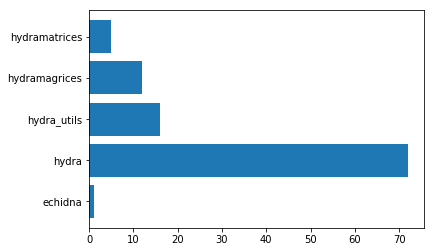

In [9]:
fig, subplot = plt.subplots()
subplot.barh(agg_df.index.values, agg_df.values)
plt.show()

## 3D-графики

Строить 3D графики стоит с осторожностью - они выглядят очень красиво, но часто у них страдает информативность и они являются просто бесполезными

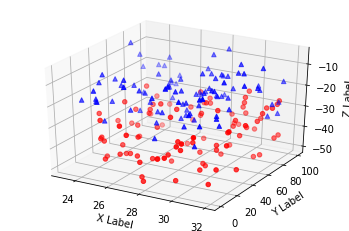

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# фиксируем рандом
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Графики из pandas

Библиотека для работы с табличными данными `pandas` позволяет "из коробки" строить красивые графики - например, для поиска корреляции по фичам. Для этой задачи служит, например, функция `pandas.scatter_matrix`

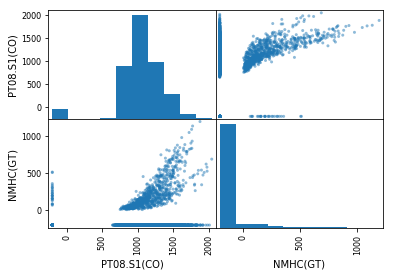

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(air_df[['PT08.S1(CO)','NMHC(GT)']])
plt.show()